In [1]:
%matplotlib notebook

import model
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from importlib import reload

<IPython.core.display.Javascript object>


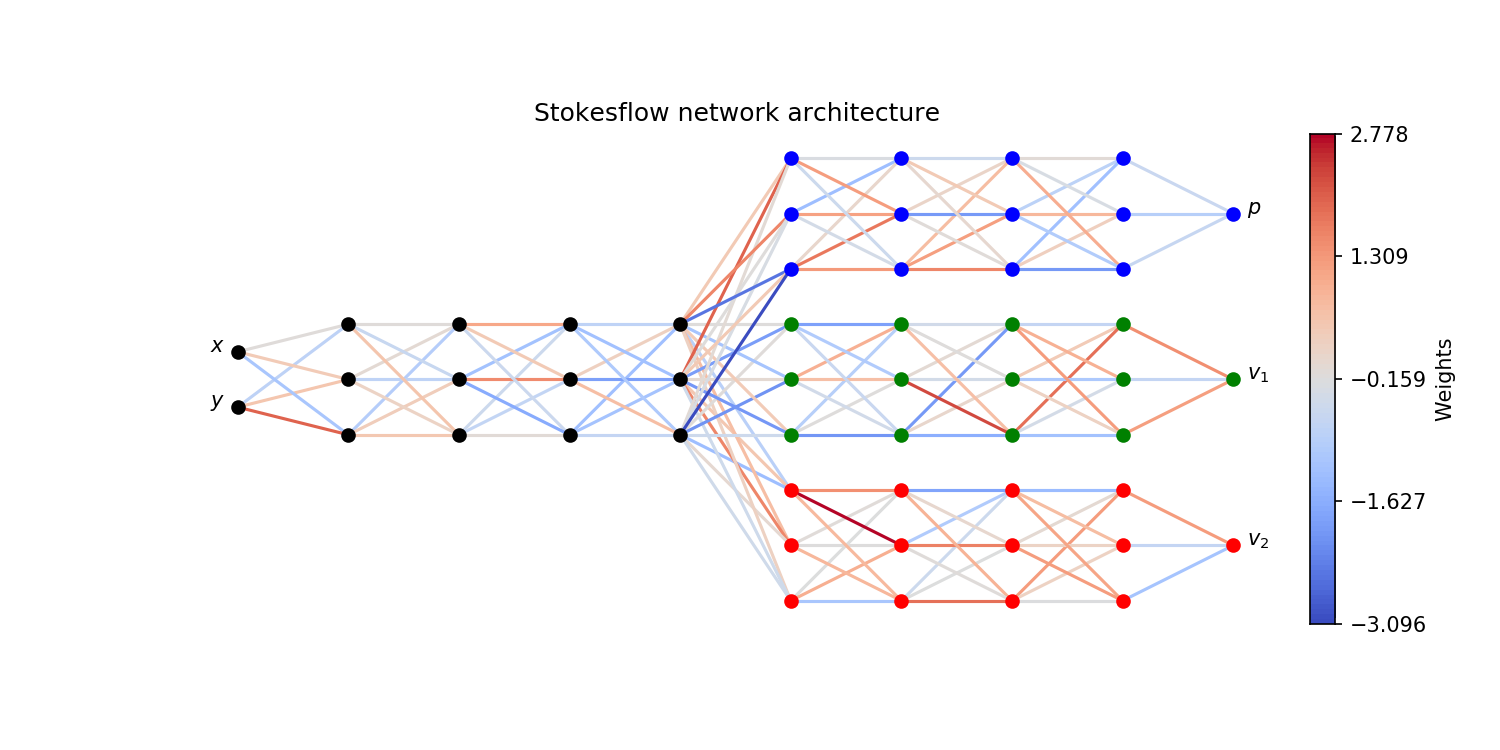

<IPython.core.display.Javascript object>


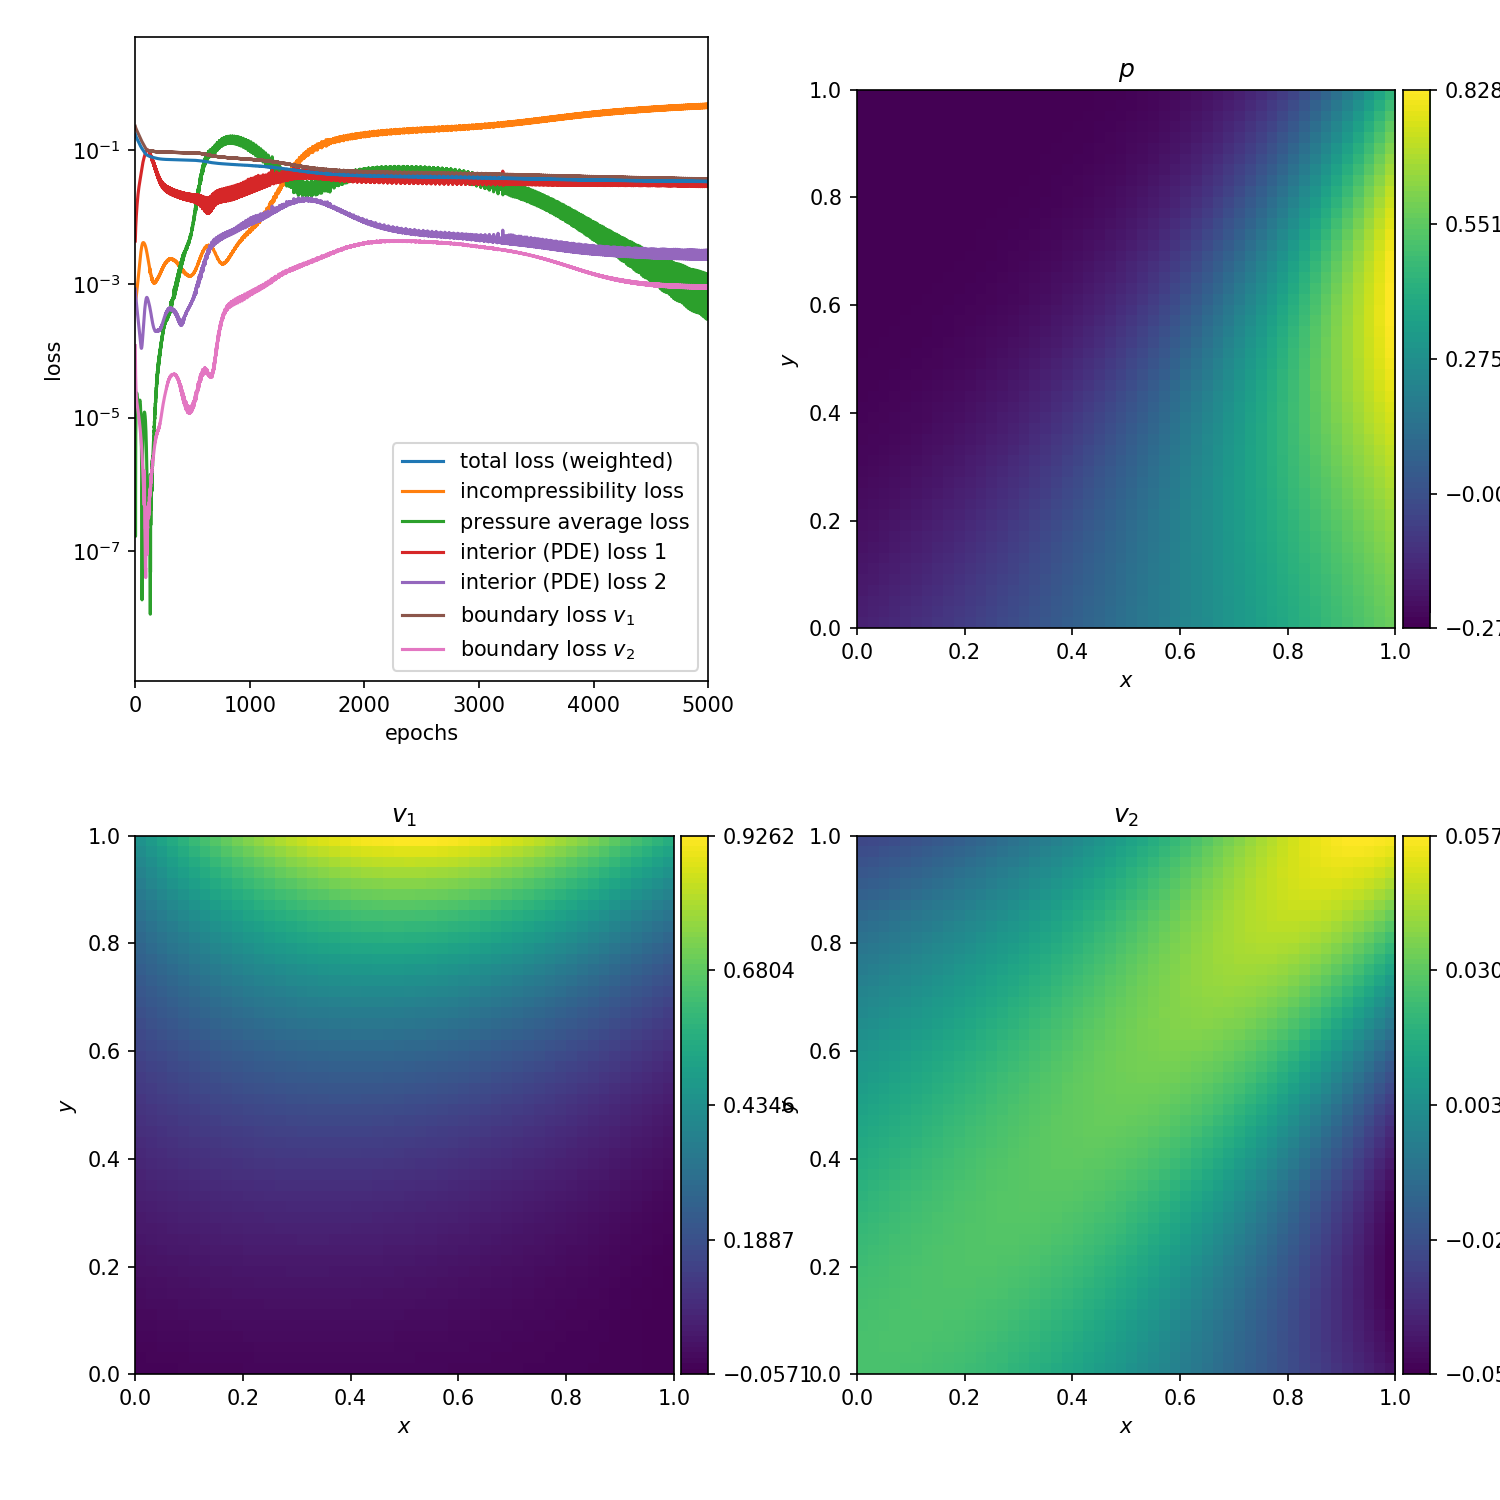

loss weights:
loss_weights(incompressibility=0.007575757575757576, pressure_average=0.007575757575757576, interior_1=0.07575757575757576, interior_2=0.07575757575757576, boundaries_v1=0.7575757575757576, boundaries_v2=0.07575757575757576)

Optimizer:
{'name': 'RMSprop', 'learning_rate': 0.001, 'decay': 0.0, 'rho': 0.9, 'momentum': 0.0, 'epsilon': 1e-08, 'centered': False}


In [2]:
reload(model)

loss_weights = np.array([1,1,10,10,100,10])
loss_weights = loss_weights/np.sum(loss_weights)

Model = model.PINN_model(
    show_network_plot   = True,
    show_training_plots = True,
    network_construction_kwargs  = dict(stem_widths = 4*[3]),
    network_vizualization_kwargs = dict(spacing_x = 2, figsize = (10,5)),
    domain_kwargs   = dict(),
    training_kwargs = dict(optimizer    = tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08),
                           loss_weights = loss_weights)
)

Model.print_training_config()

In [3]:
# Update the colors of the lines in the plot above!
Model.update_weights_plot()

In [4]:
Model.model.summary()

Model: "Stokesflow_branched_PINN"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_layer_0 (InputLayer)      [(None, 2)]          0                                            
__________________________________________________________________________________________________
stem_1 (Dense)                  (None, 3)            9           Input_layer_0[0][0]              
__________________________________________________________________________________________________
stem_2 (Dense)                  (None, 3)            12          stem_1[0][0]                     
__________________________________________________________________________________________________
stem_3 (Dense)                  (None, 3)            12          stem_2[0][0]                     
___________________________________________________________________________

<IPython.core.display.Javascript object>


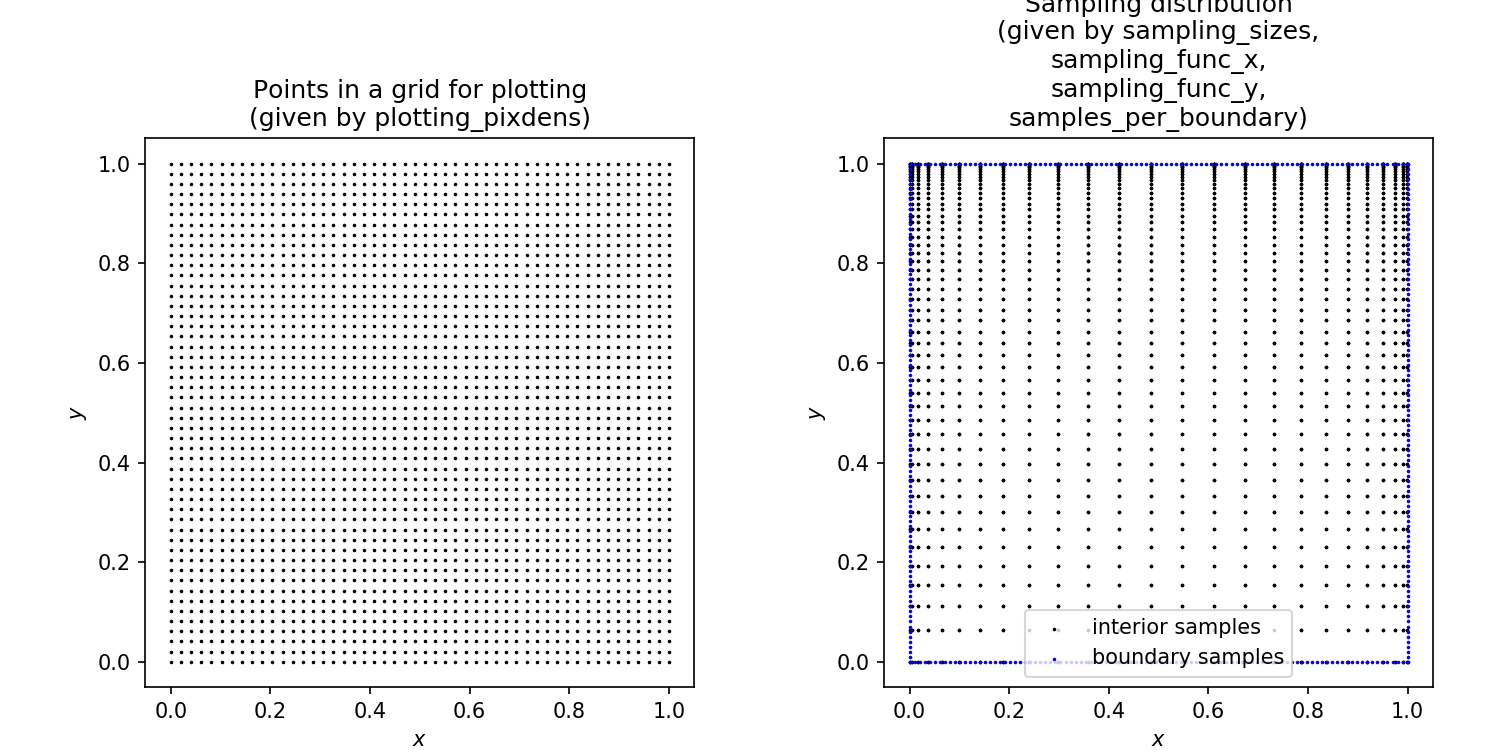

In [5]:
fig, axs = plt.subplots(1,2, figsize = (10,5))

axs[0].set_title("Points in a grid for plotting\n(given by plotting_pixdens)")
axs[0].scatter(
    Model.plotting_grid[:,0], 
    Model.plotting_grid[:,1], 
    s = 0.5, color = 'k')

axs[1].set_title("Sampling distribution\n(given by sampling_sizes,\nsampling_func_x,\nsampling_func_y,\nsamples_per_boundary)")
axs[1].scatter(
    Model.samples_interior[:,0],
    Model.samples_interior[:,1],
    s = 0.5, c = 'k', label = 'interior samples')

for i,samples_boundary in enumerate(Model.samples_boundary):
    
    if i == 0:
        label = 'boundary samples'
    else:
        label = ''
    
    axs[1].scatter(samples_boundary[:,0],
                   samples_boundary[:,1],
                   s = 0.5, c = 'b', label = label)
axs[1].legend()

for ax in axs:
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_aspect('equal','box')
    
fig.tight_layout()

fig.savefig('figures/sampling.png')

In [7]:
Model.fit(plot_update_interval = 50, n_epochs = 4000)